In [1]:
from collections import defaultdict
import numpy as np
import pandas as pd
from Bio import SeqIO
import os

# Define directories
fasta_folder = '/Users/danielgeorge/Documents/work/ml/misc/gan/fasta_files'
csv_folder = '/Users/danielgeorge/Documents/work/ml/misc/gan/traces'

# Function to read FASTA file
def read_fasta(file_path):
    with open(file_path, 'r') as file:
        return str(list(SeqIO.parse(file_path, "fasta"))[0].seq)

# Function to read CSV file
def read_csv(file_path):
    return pd.read_csv(file_path).values

# Dictionary to store the sums of chromatogram peaks
nucleotide_sums = defaultdict(lambda: [0, 0, 0, 0])
nucleotide_counts = defaultdict(int)

# Iterate through the CSV files and corresponding FASTA files
for csv_file in os.listdir(csv_folder):
    fasta_file = csv_file.replace('.csv', '.fasta')
    fasta_sequence = read_fasta(os.path.join(fasta_folder, fasta_file))
    csv_sequence = read_csv(os.path.join(csv_folder, csv_file))

    if len(csv_sequence) == 0 or len(fasta_sequence) == 0 or len(csv_sequence) != len(fasta_sequence):
       continue

    # Iterate through the sequences and accumulate the sums
    for i, nucleotide in enumerate(fasta_sequence):
        if nucleotide in 'ACGT':
            nucleotide_sums[nucleotide] += csv_sequence[i]
            nucleotide_counts[nucleotide] += 1

# Compute the average chromatogram peaks for each nucleotide
nucleotide_averages = {nucleotide: np.array(sums) / count for nucleotide, (sums, count) in zip(nucleotide_sums.keys(), zip(nucleotide_sums.values(), nucleotide_counts.values()))}

nucleotide_averages


{'C': array([ 15.43190882, 545.33944436,  10.04598913,  16.54330949]),
 'A': array([531.68890059,  21.69440984,   9.71455606,  12.01452417]),
 'T': array([ 14.77178592,  20.93766556,  13.43610669, 533.40443842]),
 'G': array([ 16.96369639,   8.59157087, 530.60717273,  14.33948342])}

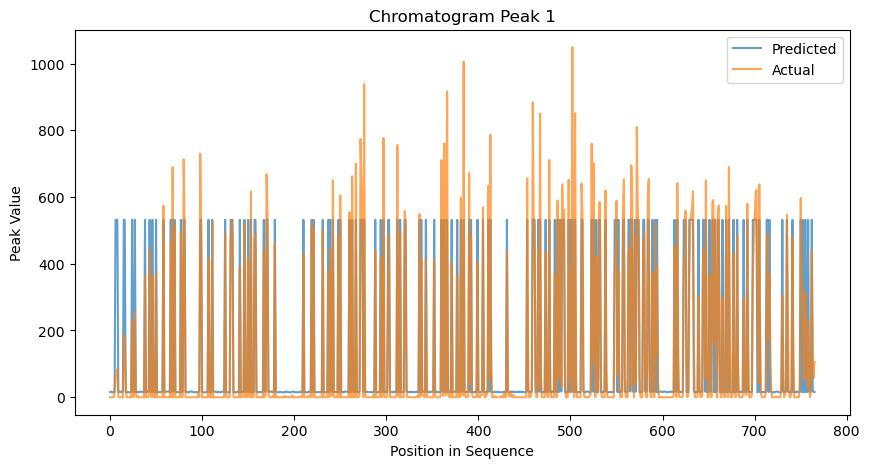

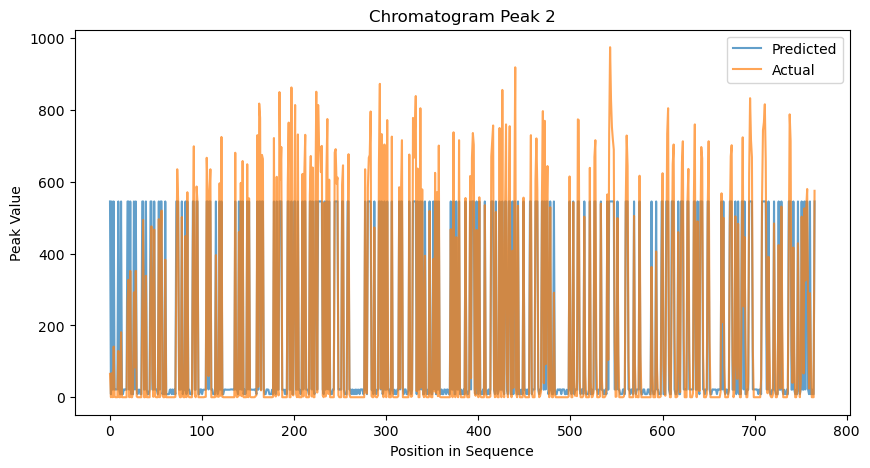

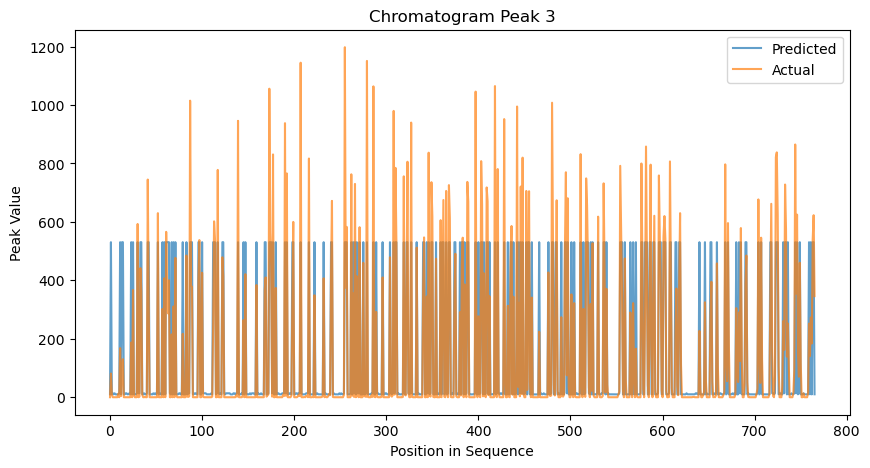

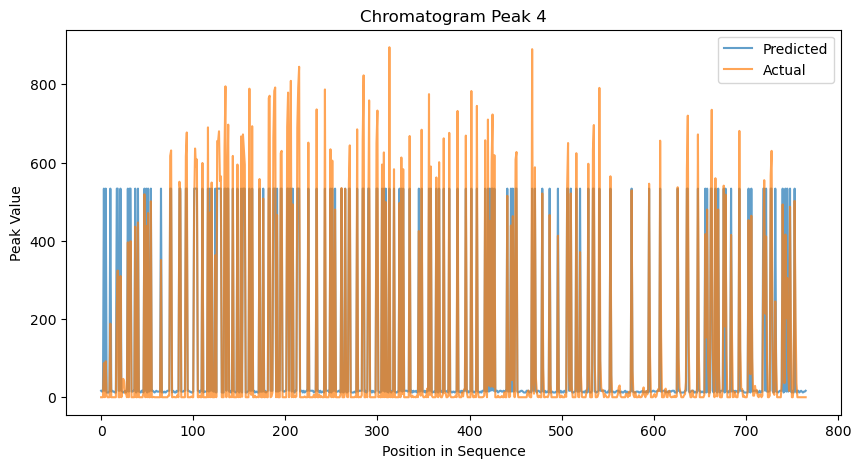

In [3]:
import matplotlib.pyplot as plt

# Paths to test FASTA and CSV files
test_fasta_file = '/Users/danielgeorge/Documents/work/ml/misc/gan/test_case/X09140N00.fasta'
test_csv_file = '/Users/danielgeorge/Documents/work/ml/misc/gan/test_case/X09140N00.csv'

# Read test FASTA and CSV files
test_fasta_sequence = read_fasta(test_fasta_file)
test_csv_sequence = read_csv(test_csv_file)

# Lists to store predictions and actual values
predictions = []
actual_values = []

# Apply naive baseline: map each nucleotide to its corresponding average chromatogram peaks
for i, nucleotide in enumerate(test_fasta_sequence):
    if nucleotide in nucleotide_averages and i < len(test_csv_sequence):
        predictions.append(nucleotide_averages[nucleotide])
        actual_values.append(test_csv_sequence[i])

# Convert to NumPy arrays for easier handling
predictions = np.array(predictions)
actual_values = np.array(actual_values)

# Plot the results for each chromatogram peak
for i in range(4):
    plt.figure(figsize=(10, 5))
    plt.plot(predictions[:, i], label='Predicted', alpha=0.7)
    plt.plot(actual_values[:, i], label='Actual', alpha=0.7)
    plt.title(f'Chromatogram Peak {i + 1}')
    plt.xlabel('Position in Sequence')
    plt.ylabel('Peak Value')
    plt.legend()
    plt.show()

In [4]:
from sklearn.metrics import mean_squared_error

# Calculate the Mean Squared Error (MSE) for each chromatogram peak
mse_values = [mean_squared_error(actual_values[:, i], predictions[:, i]) for i in range(4)]

# Return the MSE for each peak
mse_values

[6713.604573160264, 9179.700800216604, 14869.398360237077, 5435.535990091989]